## Import data

In [1]:
import sys
sys.path.append('..')
from pipeline import ResultsPipe

`subject_code` - any string for naming result files.

`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`output_directory` - a directory you want the results to be saved in

`path_to_hypno` - visbrain's [point-per-second](http://visbrain.org/sleep.html#save-hypnogram) type of hypnogram

`sf_hypno` - hypnogram sampling frequency (visbrain's hypnograms default to 1)

In [2]:
results_pipe = ResultsPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1)

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


01-Mar-23 00:10:26 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


### Hypnospectrogram

Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


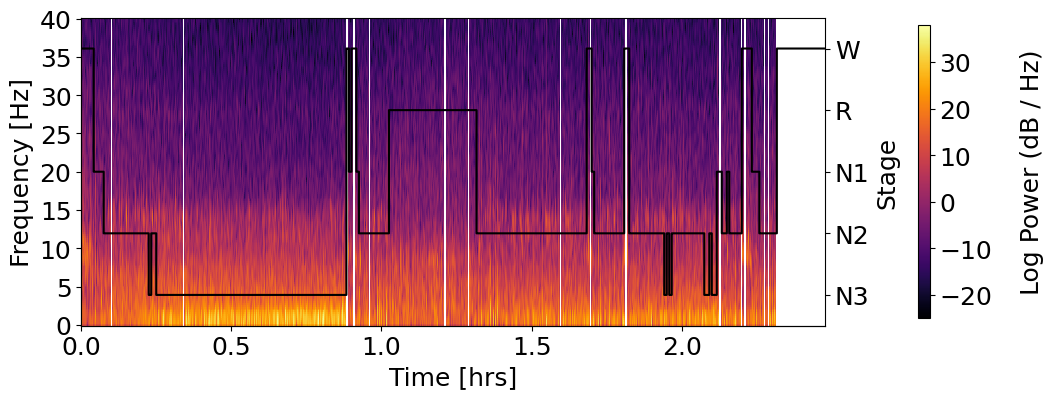

In [3]:
results_pipe.plot_hypnospectrogram(
    picks=['E101'],
    win_sec=4,
    freq_range=(0, 40),
    cmap='inferno',
    overlap=True,
    save=True)

### Power Spectral Density

Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


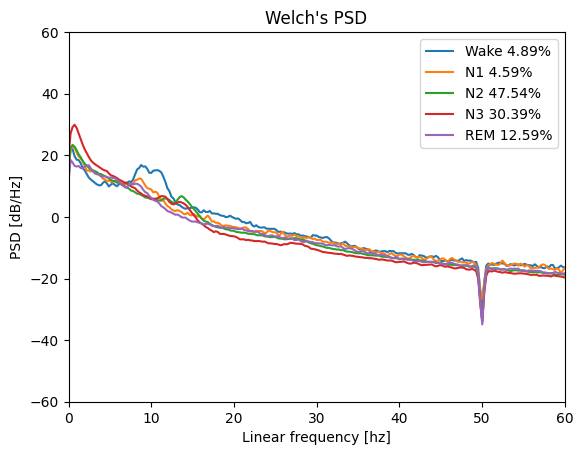

In [4]:
results_pipe.plot_psd_per_stage(
    picks=['E101'], 
    sec_per_seg=4.096,
    psd_range=(-60, 60),
    freq_range=(0, 60),
    xscale='linear',
    sleep_stages={'Wake' :0, 'N1' :1, 'N2': 2, 'N3': 3, 'REM': 4},
    save=True)

### Topomap

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\notebooks\..\pipeline.py:314: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  temp_raw = self.mne_raw.copy().set_annotations(self.mne_raw.annotations+annots, verbose='WARNING')


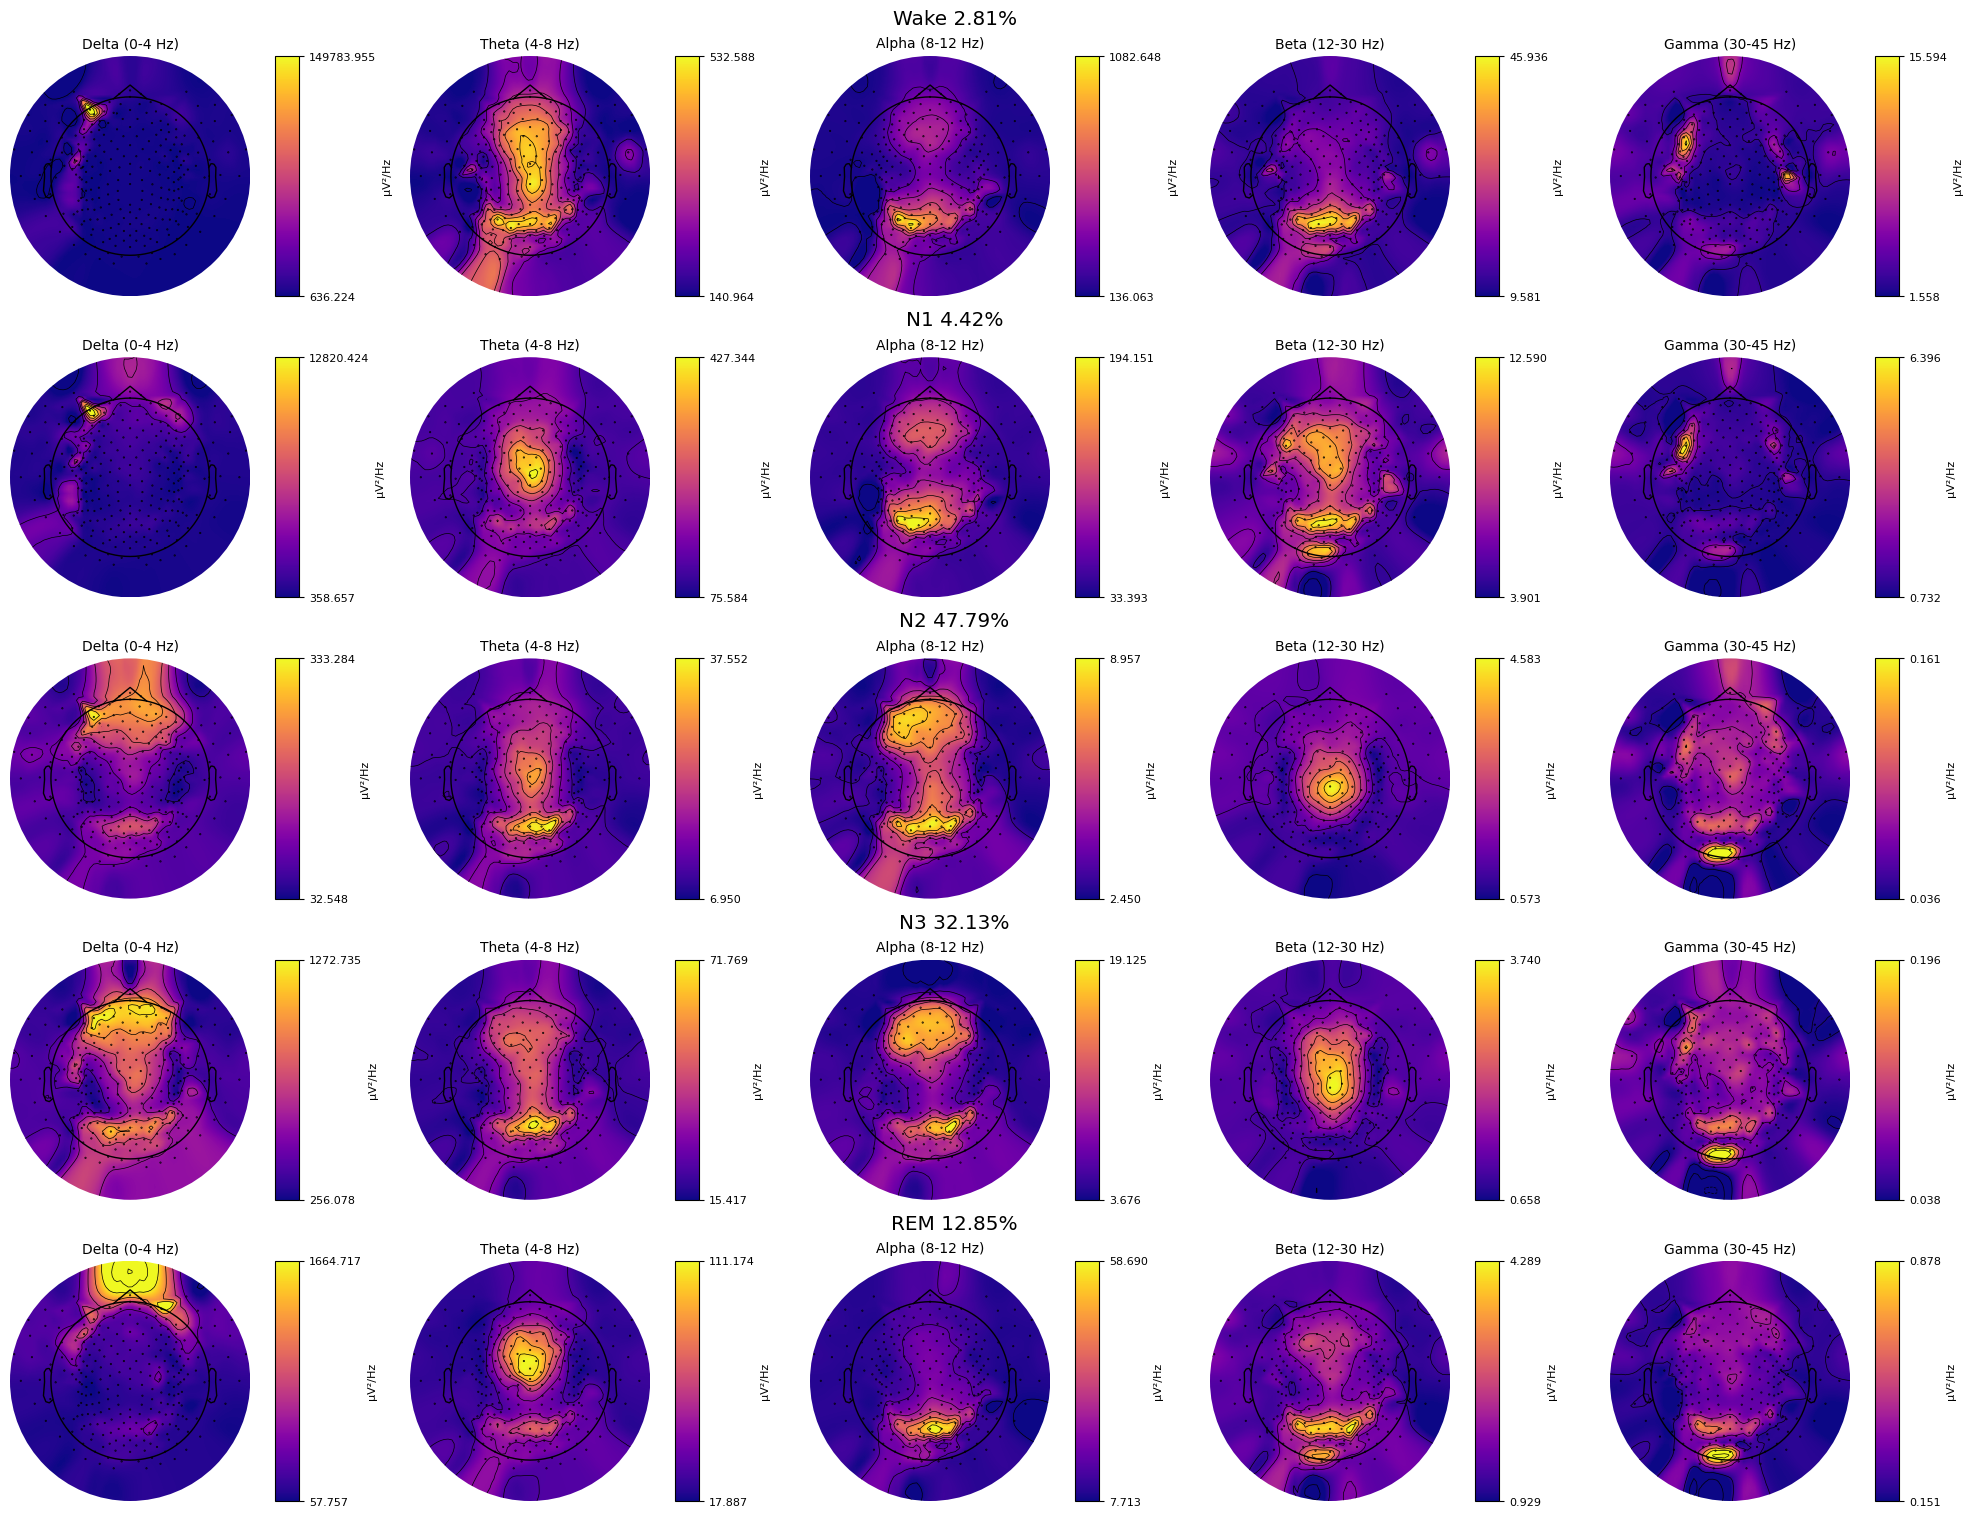

In [5]:
results_pipe.plot_topomap(
    sleep_stages = {'Wake': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'REM': 4},
    bands = {'Delta (0-4 Hz)': (0, 4), 'Theta (4-8 Hz)': (4, 8),
            'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),
            'Gamma (30-45 Hz)': (30, 45)},
    save=True
)

### Sleep Stats

In [6]:
results_pipe.sleep_stats()

{'TIB': 148.66666666666666,
 'SPT': 136.5,
 'WASO': 5.5,
 'TST': 131.0,
 'N1': 6.5,
 'N2': 65.5,
 'N3': 41.5,
 'REM': 17.5,
 'NREM': 113.5,
 'SOL': 2.5,
 'Lat_N1': 2.5,
 'Lat_N2': 4.5,
 'Lat_N3': 13.5,
 'Lat_REM': 61.5,
 '%N1': 4.961832061068702,
 '%N2': 50.0,
 '%N3': 31.6793893129771,
 '%REM': 13.358778625954198,
 '%NREM': 86.6412213740458,
 'SE': 88.11659192825113,
 'SME': 95.97069597069597}